# Random Forest

In [1]:
import pathlib
import importlib
import re

import pandas as pd
import numpy as np
import feather
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.metrics import plot_roc
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In /home/pspenano/miniconda3/envs/intro-ml-ws/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pspenano/miniconda3/envs/intro-ml-ws/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pspenano/miniconda3/envs/intro-ml-ws/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pspenano/miniconda3/envs/intro-ml-ws/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two mi

In [2]:
DATA_PATH = pathlib.Path('./data')
RESULTS_PATH = pathlib.Path('./results')

In [3]:
X_train = feather.read_dataframe(DATA_PATH / 'X_train')
y_train = feather.read_dataframe(DATA_PATH / 'y_train')
y_train = y_train['target']
X_test = feather.read_dataframe(DATA_PATH / 'X_test')
y_test = feather.read_dataframe(DATA_PATH / 'y_test')
y_test = y_test['target']

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((733451, 22), (733451,), (293094, 22), (293094,))

# Outline

- What is a random forest model? How does it work? Why does it work well?
- How to use it in scikit-learn? What are some important parameters to consider?
- Train and compare on holdout set
- Performance compared to a single decision tree

## Random Forest 

A random forest model is learning algorithm that trains multiple decision trees on random partitions of your dataset. The partition is done across records (rows) and across features. The model can be used for both classification and regression problems. For classification, a random forest model can predict the mode of the prediction of each of its trees. For regression, one can use the mean or the median.

As we saw in the previsous lesson, a single decision tree is prone to overfitting. Ensuring that each tree only see a subset of the training data reduces this risk. 

Perhaps interviews for job candidates is a good analogy for this. Each interviewer focuses on a different skillset of the the candidate. One tests their programming skill, another their ability to communicate, and another perhaps their knowledge of the industry. Each interview is uncorrelated because they review a different skill set. The aggregate of their recommendations would form a more reliable assessment of the candidate than if the candidate were to be interviewed only by a single interviewer testing a specific skillset.

## Parameters in ScikitLearn

Here are a few important parameters to tune when training a random forest model and some comments on when the random forest overfits if the value is large or small.

| Parameter | Description | Comment |
| --------- | ----------- |---------|
|max_depth | Maximum of depth of each tree | Overfits if large |
|n_estimators | The number of trees in the forest | Increasing reduces overfitting |
|min_samples_split | Min. number of samples before splitting | Overfits if small |
|min_samples_leaf | Min. number of samples in a leaf node | Overfits if small |
|min_impurity_decrease | Criteria for splitting a node | Overfits if small |




In [5]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=10, n_jobs=-1, max_depth=10)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [6]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

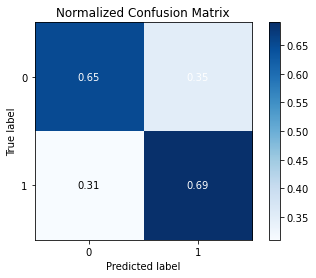

In [7]:
plot_confusion_matrix(y_train, y_train_pred, normalize=True)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

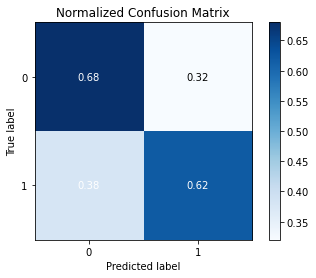

In [8]:
plot_confusion_matrix(y_test, y_test_pred, normalize=True)

# GridSearch

In [9]:
RandomForestClassifier?

In [20]:
# param_grid = {
#     'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
#     'n_estimators': [5, 10, 15, 20],
#     'min_samples_split': [2, 20],
#     'min_samples_leaf': [1, 10, 100],
#     'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
#     'class_weight': [None, 'balanced']
#     }

param_grid = {
    'max_depth': [15],
    'n_estimators': [15],
    'min_samples_split': [20],
    'min_samples_leaf': [100],
    'min_impurity_decrease': [0.01],
    'class_weight': [None, 'balanced']
    }

In [21]:
clf = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=param_grid,
                   scoring='f1_macro',
                   n_jobs=-1,
                   verbose=10)

In [39]:
import time
start = time.time()
clf.fit(X_train, y_train)
print("Time elapsed (min):", (time.time() - start)/60)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Time elapsed (min): 0.14350512822469075


In [23]:
clf.best_params_

{'class_weight': 'balanced',
 'max_depth': 15,
 'min_impurity_decrease': 0.01,
 'min_samples_leaf': 100,
 'min_samples_split': 20,
 'n_estimators': 15}

In [24]:
y_test_pred2 = clf.predict(X_test)
y_train_pred2 = clf.predict(X_train)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

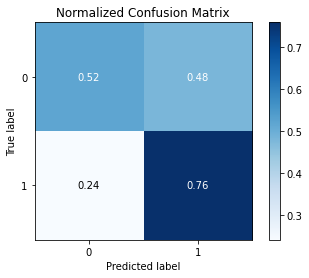

In [25]:
# Original model
plot_confusion_matrix(y_train, y_train_pred2, normalize=True)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

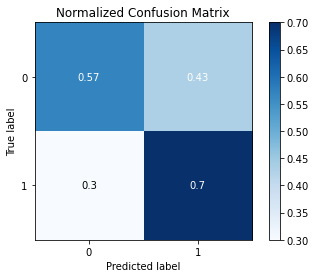

In [26]:
# Grid search model
plot_confusion_matrix(y_test, y_test_pred2, normalize=True)

# ROC curves

In [27]:
y_test_proba = rf.predict_proba(X_test)
y_test_proba2 = clf.predict_proba(X_test)

In [28]:
y_test_proba[:, 1]

array([0.61683394, 0.52793507, 0.51552668, ..., 0.42413502, 0.64342247,
       0.64924246])

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, y_test_proba2[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)

In [30]:
tree_fpr, tree_tpr = [0.429495846156583], [0.7037161865127047]

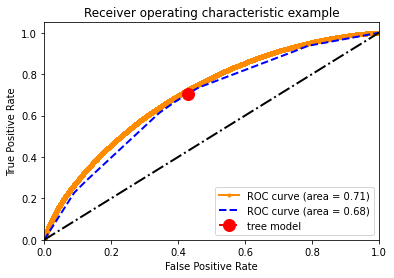

In [31]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, marker='.')
plt.plot(fpr2, tpr2, color='blue',
         lw=lw, ls='--', label='ROC curve (area = %0.2f)' % roc_auc2, marker='.', markersize=0.1)
plt.plot(tree_fpr, tree_tpr, color='red',
         lw=lw, ls='--', label='tree model' % roc_auc2, marker='o', markersize=12)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

[]

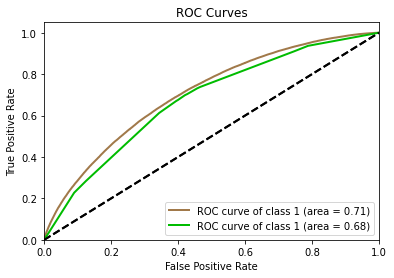

In [32]:
# Alternative approach to creating ROC curve using scikit-plot library
ax = plt.gca()
rf_disp = plot_roc(y_test, y_test_proba, classes_to_plot=[1], plot_micro=False, plot_macro=False, ax=ax, cmap='cubehelix')
clf_disp = plot_roc(y_test, y_test_proba2, classes_to_plot=[1], plot_micro=False, plot_macro=False, ax=ax)
clf_disp.plot()

# Feature Importance

In [33]:
feature_importance = pd.DataFrame(zip(X_train.columns, rf.feature_importances_), columns=['feature', 'importance'])
feature_importance2 = pd.DataFrame(zip(X_train.columns, clf.best_estimator_.feature_importances_), columns=['feature', 'importance'])

In [34]:
feature_importance = feature_importance.sort_values(by=['importance'], ascending=False)
feature_importance.index = feature_importance['feature']

In [35]:
feature_importance2 = feature_importance2.sort_values(by=['importance'], ascending=False)
feature_importance2.index = feature_importance2['feature']

<AxesSubplot:xlabel='feature'>

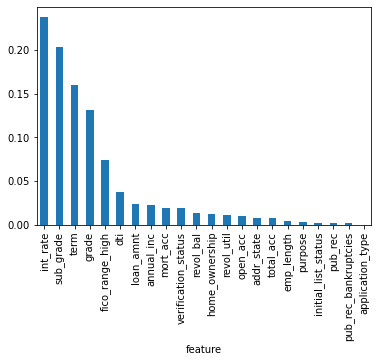

In [36]:
# Original model
feature_importance['importance'].plot(kind='bar')

<AxesSubplot:xlabel='feature'>

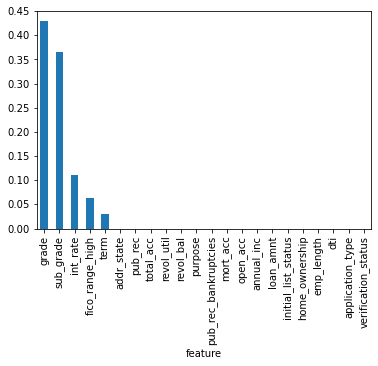

In [37]:
# Grid search model
feature_importance2['importance'].plot(kind='bar')